# Introduction to SageMath

## Where are we?

This is a [Jupyter](https://jupyter.org/) notebook for SageMath. 

Jupyter provides a system to mix text and code in a worksheet. It can work with different "kernels", SageMath is one possible kernel

The next cell is a code cell, you can execute it by typing Shift+Enter

In [1]:
6*7

42

## Some python

SageMath is coded in python, so cells can actually contain elaborate python code

[Project Euler problem number 1](https://projecteuler.net/problem=1)

*If we list all the natural numbers below $10$ that are multiples of $3$ or $5$, we get $3, 5, 6$ and $9$. The sum of these multiples is $23$. Find the sum of all the multiples of $3$ or $5$ below $1000$*

[Project Euler problem number 2](https://projecteuler.net/problem=2)

*Each new term in the Fibonacci sequence is generated by adding the previous two terms. By starting with $1$ and $2$, the first $10$ terms will be:*
$$1, 2, 3, 5, 8, 13, 21, 34, 55, 89, \dots$$
*By considering the terms in the Fibonacci sequence whose values do not exceed four million, find the sum of the even-valued terms.*

In [2]:
def fibo(n):
    f1 = 0
    f2 = 1
    while f2 <n:
        yield f2
        f1, f2 = f2, f1+f2

In [4]:
sum(v for v in fibo(4000000) if v%2 == 0)

4613732

Viviane's problem:

*Generate all words $w$ on $\mathbb{N}$ of length $n$ starting with zero such that $0 \leq w_{i+1} \leq w_i + 1$*

In [10]:
def my_words(n):
    if n == 0:
        yield tuple()
    elif n == 1:
        yield (0,)
    else:
        for w in my_words(n-1):
            for i in range(w[-1]+2):
                yield w + (i,)

In [11]:
list(my_words(3))

[(0, 0, 0), (0, 0, 1), (0, 1, 0), (0, 1, 1), (0, 1, 2)]

In [13]:
[len(list(my_words(n))) for n in range(10)]

[1, 1, 2, 5, 14, 42, 132, 429, 1430, 4862]

## Some maths

But Sage contains a bunch of mathematical stuff and librairies and can do most of "classical math" and calculus computation

In [2]:
f(x) = x^2*sin(x) + (x-1)*cos(x)^2

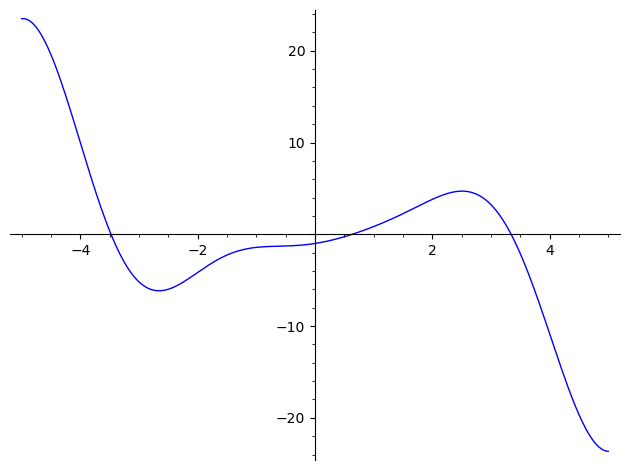

In [3]:
f.plot(xmin = -5, xmax=5)

In [4]:
g = f.derivative()(2)*(x-2) + f(2)

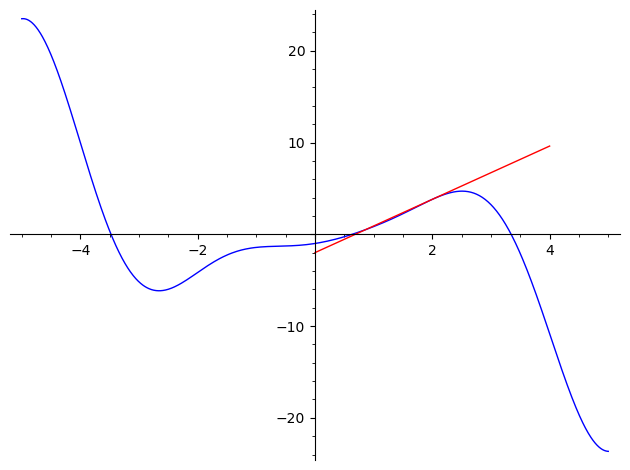

In [5]:
f.plot(xmin = -5, xmax=5) + g.plot(xmin = 0, xmax = 4, color = "red")

In [6]:
solve(x^2 + 3*x + 2, x)

[x == -2, x == -1]

In [7]:
t = var('t')    
x = function('x')(t)
DE = diff(x, t) + x - 1
desolve(DE, [x,t])

(_C + e^t)*e^(-t)

Note that Sage adds some extra math syntax on top of python (when using the notebook or the sage terminal)

In [8]:
2^3 # means 2 to the power of 3 (2**3 in python)

8

In [9]:
a = 2 # not a python int
type(a)

<class 'sage.rings.integer.Integer'>

In [10]:
a.is_prime()

True

In [11]:
l = [i for i in range(3)]
b = l[-1]
b

2

In [12]:
type(b)

<class 'int'>

## Many objects from combinatorics

In [13]:
list(DyckWords(3))

[[1, 0, 1, 0, 1, 0],
 [1, 0, 1, 1, 0, 0],
 [1, 1, 0, 0, 1, 0],
 [1, 1, 0, 1, 0, 0],
 [1, 1, 1, 0, 0, 0]]

In [14]:
[w.to_area_sequence() for w in DyckWords(3)]

[[0, 0, 0], [0, 0, 1], [0, 1, 0], [0, 1, 1], [0, 1, 2]]

## Basics: finding and getting help

Many objects are imported by default. If you start typing their name and use the TAB key, it might autocomplete

In [15]:
DyckW

NameError: name 'DyckW' is not defined

Not *all objets* are imported, sometimes, you need to do a manual import. You can browse the [documentation](https://doc.sagemath.org/) to see if you find what you're looking for.

To know how to create a specific object or use a certain function / method, you can use the "?" sign

In [16]:
DyckWord?

Type:            LazyImport
String form:     <class 'sage.combinat.dyck_word.DyckWord'>
File:            ~/miniconda3/envs/jupyter-sage/lib/python3.11/site-packages/sage/misc/lazy_import.pyx
Docstring:      
   A Dyck word.

   A Dyck word is a sequence of open and close symbols such that every
   close symbol has a corresponding open symbol preceding it. That is
   to say, a Dyck word of length n is a list with k entries 1 and n -
   k entries 0 such that the first i entries always have at least as
   many 1s among them as 0s. (Here, the 1 serves as the open symbol
   and the 0 as the close symbol.)  Alternatively, the alphabet 1 and
   0 can be replaced by other characters such as '(' and ')'.

   A Dyck word is *complete* if every open symbol moreover has a
   corresponding close symbol.

   A Dyck word may also be specified by either a noncrossing partition
   or by an area sequence or the sequence of heights.

   A Dyck word may also be thought of as a lattice path in the \ZZ^2
  

In [34]:
dw = DyckWord([1,0,1,0])

Once you have an object, you can use "." + the TAB key to see *all the methods* you can use on it

In [ ]:
dw.

In [35]:
dw.to_area_sequence?

Signature:      dw.to_area_sequence() -> 'list[int]'
Docstring:     
   Return the area sequence of the Dyck word "self".

   The area sequence of a Dyck word w is defined as follows:
   Representing the Dyck word w as a Dyck path from (0, 0) to (n, n)
   using N and E steps (this involves padding w by E steps until w
   reaches the main diagonal if w is not already a complete Dyck
   path), the area sequence of w is the sequence (a_1, a_2, ...,
   a_n), where a_i is the number of full cells in the i-th row of the
   rectangle [0, n] x [0, n] which lie completely above the
   diagonal. (The cells are the regions into which the rectangle is
   subdivided by the lines x = i with i integer and the lines y = j
   with j integer. The i-th row consists of all the cells between the
   lines y = i-1 and y = i.)

   An alternative definition: Representing the Dyck word w as a Dyck
   path consisting of NE and SE steps, the area sequence is the
   sequence of ordinates of all lattice points on t

If you use "??", you get the source code of the method

In [36]:
dw.to_area_sequence??

Signature: dw.to_area_sequence() -> 'list[int]'
Docstring:
   Return the area sequence of the Dyck word "self".

   The area sequence of a Dyck word w is defined as follows:
   Representing the Dyck word w as a Dyck path from (0, 0) to (n, n)
   using N and E steps (this involves padding w by E steps until w
   reaches the main diagonal if w is not already a complete Dyck
   path), the area sequence of w is the sequence (a_1, a_2, ...,
   a_n), where a_i is the number of full cells in the i-th row of the
   rectangle [0, n] x [0, n] which lie completely above the
   diagonal. (The cells are the regions into which the rectangle is
   subdivided by the lines x = i with i integer and the lines y = j
   with j integer. The i-th row consists of all the cells between the
   lines y = i-1 and y = i.)

   An alternative definition: Representing the Dyck word w as a Dyck
   path consisting of NE and SE steps, the area sequence is the
   sequence of ordinates of all lattice points on the path wh

In [37]:
dw._area_sequence_iter??

Signature: dw._area_sequence_iter() -> 'Iterator[int]'
Docstring:
   Return an iterator producing the area sequence.

   See also: "to_area_sequence()"

   EXAMPLES:

      sage: d = DyckWord([1, 0, 1, 0])
      sage: [a for a in d._area_sequence_iter()]
      [0, 0]
Source:   
    def _area_sequence_iter(self) -> Iterator[int]:
        """
        Return an iterator producing the area sequence.

        .. SEEALSO:: :meth:`to_area_sequence`

        EXAMPLES::

            sage: d = DyckWord([1, 0, 1, 0])
            sage: [a for a in d._area_sequence_iter()]
            [0, 0]
        """
        a = 0
        for move in self:
            if move == open_symbol:
                yield a
                a += 1
            else:
                a -= 1
File:      ~/miniconda3/envs/jupyter-sage/lib/python3.11/site-packages/sage/combinat/dyck_word.py
Type:      method